In [1]:
from sklearn.datasets import make_classification

In [2]:
#X is independent feature 
#y is dependent feature 


X,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=1)

In [3]:
X,y

(array([[ 1.53682958, -1.39869399],
        [ 1.55110839,  1.81032905],
        [ 1.29361936,  1.01094607],
        ...,
        [-0.55662536, -0.15983725],
        [ 1.00499902,  0.93628981],
        [ 1.46210987,  1.14497791]]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [4]:
import pandas as pd

In [5]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)

In [6]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [7]:
final_df['target'].value_counts()

target
0    894
1    106
Name: count, dtype: int64

In [8]:
import matplotlib.pyplot as plt


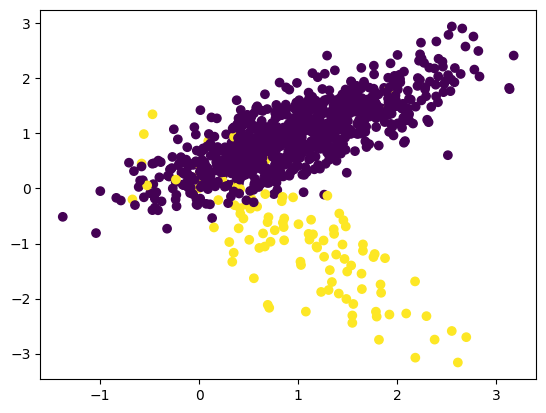

In [9]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
#transform the dataset 

oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [22]:
X.shape,y.shape

((1788, 2), (1788,))

In [23]:
len(y[y==0])

894

In [24]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

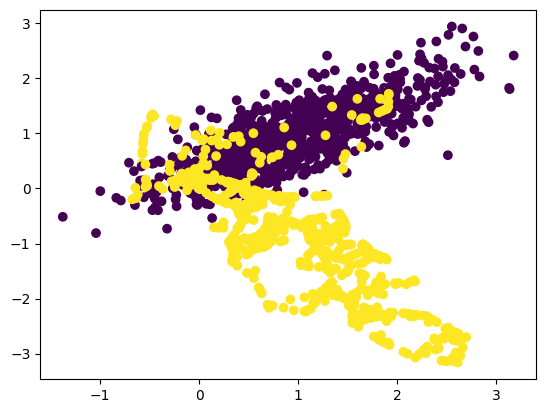

In [25]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

the above was using smote upsampling and downsampling 

# interpolation 

##  1.Linear Interpolation 

In [26]:
import numpy as np

x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

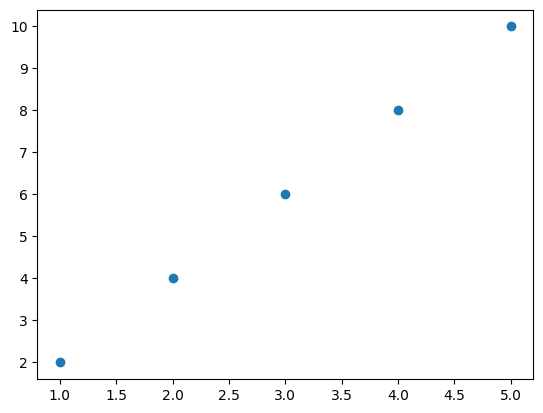

In [27]:
plt.scatter(x,y)

In [28]:
#interpolate the data using linear interpolation 

x_new=np.linspace(1,5,10)  #create new x values 
y_interp=np.interp(x_new,x,y)  #interpolate y values 
print(y_interp)

[ 2.          2.88888889  3.77777778  4.66666667  5.55555556  6.44444444
  7.33333333  8.22222222  9.11111111 10.        ]


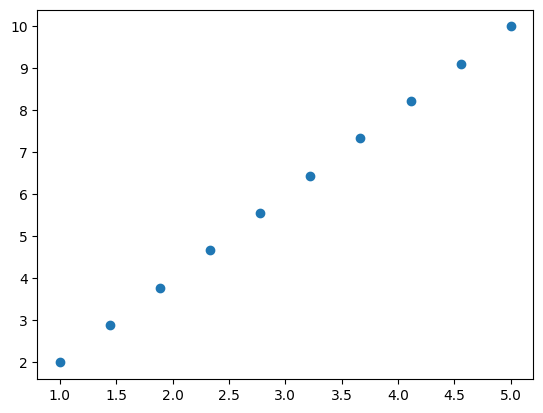

In [29]:
plt.scatter(x_new,y_interp)

# cubic interpolation with scipy

In [30]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])


In [31]:
from scipy.interpolate import interp1d

In [33]:
#create a cubic interpolation function 
f=interp1d(x,y,kind='cubic')

In [34]:
#interpolate the data
x_new1=np.linspace(1,5,10)
y_interp1=f(x_new1)
print(y_interp1)

[  1.           3.01371742   6.739369    12.7037037   21.43347051
  33.45541838  49.2962963   69.48285322  94.54183813 125.        ]


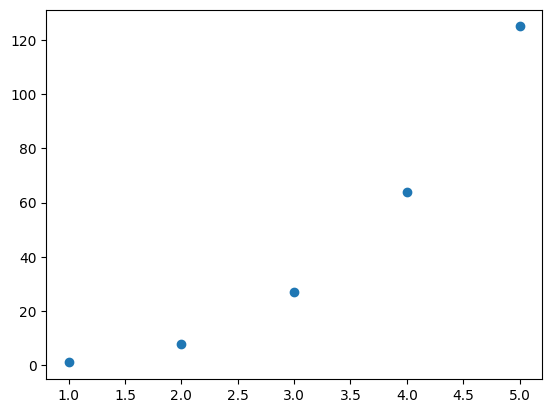

In [35]:
plt.scatter(x,y)

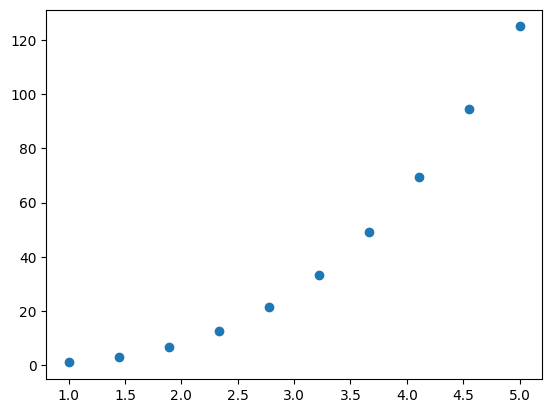

In [36]:
plt.scatter(x_new1,y_interp1)

# polynomial interpolation 

In [37]:
x1=np.array([1,2,3,4,5])
y1=np.array([1,8,27,64,125])

In [39]:
#interpolate the data using  polynomial interpolation 
p=np.polyfit(x1,y1,2) #fit a 2nd degree polynomial to the data 
#interpolate the data
x_new2=np.linspace(1,5,10)
y_interp2=np.polyval(p,x_new2)  #interpolate y values 
print(y_interp2)

[  2.2          1.48888889   4.33333333  10.73333333  20.68888889
  34.2         51.26666667  71.88888889  96.06666667 123.8       ]


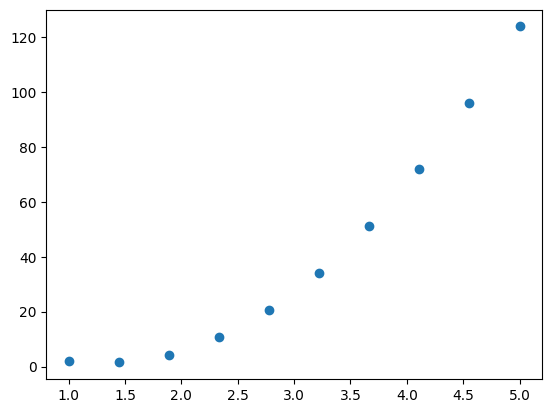

In [40]:
plt.scatter(x_new2,y_interp2)